## Data Science Project - Dataset Employee Attrition

Neste documento serão demonstradas as etapas da análise exploratória, tratamento da base de dados, aplicação dos algoritmos de Machine Learning e avaliação de métricas de desempenho de cada modelo. O objetivo é praticar os conceitos à aprendizado supervisionado.

_**Tratamento da base de dados**_: Verificação de missing values (_NaN_), limpeza do dataset, dimensão e informações gerais sobre características das variáveis

_**Análise exploratória**_: Correlograma e _mutual information_, histograma para análise das variáveis categóricas, estatísticas descritivas e avaliação de variáveis contínuas.

_**Machine Learning (ML)**_: Regressão Logística, _Random Forest_, e _Multi Layer Perceptron_ (MLP)

_**Métricas de desempenho**_: Acurácia, Matriz de confusão e F1score.

**P.s: O repositório contém um código em R contendo outras aplicações referentes ao dataset "Employee Attrition". O código complementar contém análise em relação ao balanceamento de dados e outros algoritmos".**

## Etapas dentro do projeto

1. Entendimento do problema de negócio
2. Extração/Obtenção de dados
3. Ajuste de dados (Limpeza dos dados)
4. Análise exploratória
5. Modelagem + Algoritmos
6. Interpretação dos resultados

## Contexto

- A base de dados disponível contém informações gerais e características de funcionários de uma determinada empresa, e o principal objetivo é analisar a possibilidade de atrito/desgaste baseados na informações disponíveis pelos atributos do dataset.
- O objetivo principal é determinar um modelo de classificação eficiente para predição de atritos existentes a partir das informações disponíveis, investigando as colunas a partir da análise exploratória dos dados e avaliação de diferentes modelos para aprendizado supervisionado.
- Nesse tipo de contexto, é interesse entender as principais features utilizadas pelos modelos para a causa de estresse/atrito no ambiente de trabalho. **Essa análise pode evitar constrangimentos entre funcionários, facilitar a identificação de possíveis casos de _burnout_ e a auxiliar na gerência de contratações/realocações do time. Naturalmente, o componente humano na gestão e gerência de conflitos é insubstituível, e um modelo de aprendizado de máquina nunca será capaz de substituir esse aspecto social. Contudo pode ser utilizado como ferramenta para análise dos recursos humanos presentes dentre das instituições/empresas.**

In [55]:
## Importando das principais bibliotecas 

# Bibliotecas para manipulação de dados e visualização gráfica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.simplefilter('ignore')

# Modificando o diretório de trabalho
path = r'C:\Users\cador\OneDrive\Área de Trabalho\Projetos Github\DS Project - Employee Attrition'
os.chdir(path)

# Bibliotecas utilizadas para tratamento da base de dados e ML
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Bibliotecas para modelagem e preparação dos dados
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, mean_squared_error, classification_report
from sklearn.feature_selection import mutual_info_classif

# Importação da base de dados
dset = pd.read_csv('HR Employee Attrition.csv', sep = ',')
dset = pd.DataFrame(dset)

# Criando uma cópia do dataset original
dset2 = dset.copy()
print("Dimensão da base de dados: ",len(dset)," x ",len(dset.columns))

# Verificação dos dados no início da tabela
dset.info()

# Verificando missing values (NaN)
dset.isna()
#print(dset.isnull().sum())
dset.dropna(inplace = True)

# Variáveis do problema
print(f'Variáveis do problema: \n{dset[dset.columns[:-1]].columns.tolist()}\n')

Dimensão da base de dados:  1470  x  35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-nul

- O dataset é composto essencialmente por variáveis numéricas (decimais e inteiras) e categóricas, com uma quantidade limitada de linhas. Desse modo, a exclusão de linhas ou colunas podem impactar diretamente o desempenho do treinamento dos modelos de machine learning;
- Dimensão do dataset: 1470 x 35;
- Não foi verificada a presença de dados faltantes (NaN);
- Será feita a separação das variáveis categóricas e numéricas para análises individuais, além da separação da variável dependente **_Attrition_** como tratamento inicial dessa base de dados.

In [56]:
## Tratamento das variáveis presentes no dataset

X = dset.drop('Attrition', axis = 1)
Y = dset['Attrition']                        # Variável dependente - Desgaste/atrito na empresa

# Separando variáveis contínuas e categóricas

categ = X.select_dtypes(include = 'object')  # dataframe com variávies categóricas
num = X.select_dtypes(include = 'int64')     # dataframe com variáveis numéricas 

display(categ.columns.to_list())
display(num.columns.to_list())

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### Análise de frequência das variáveis categóricas

- Histograma para análise da distribuição das variáveis categóricas

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

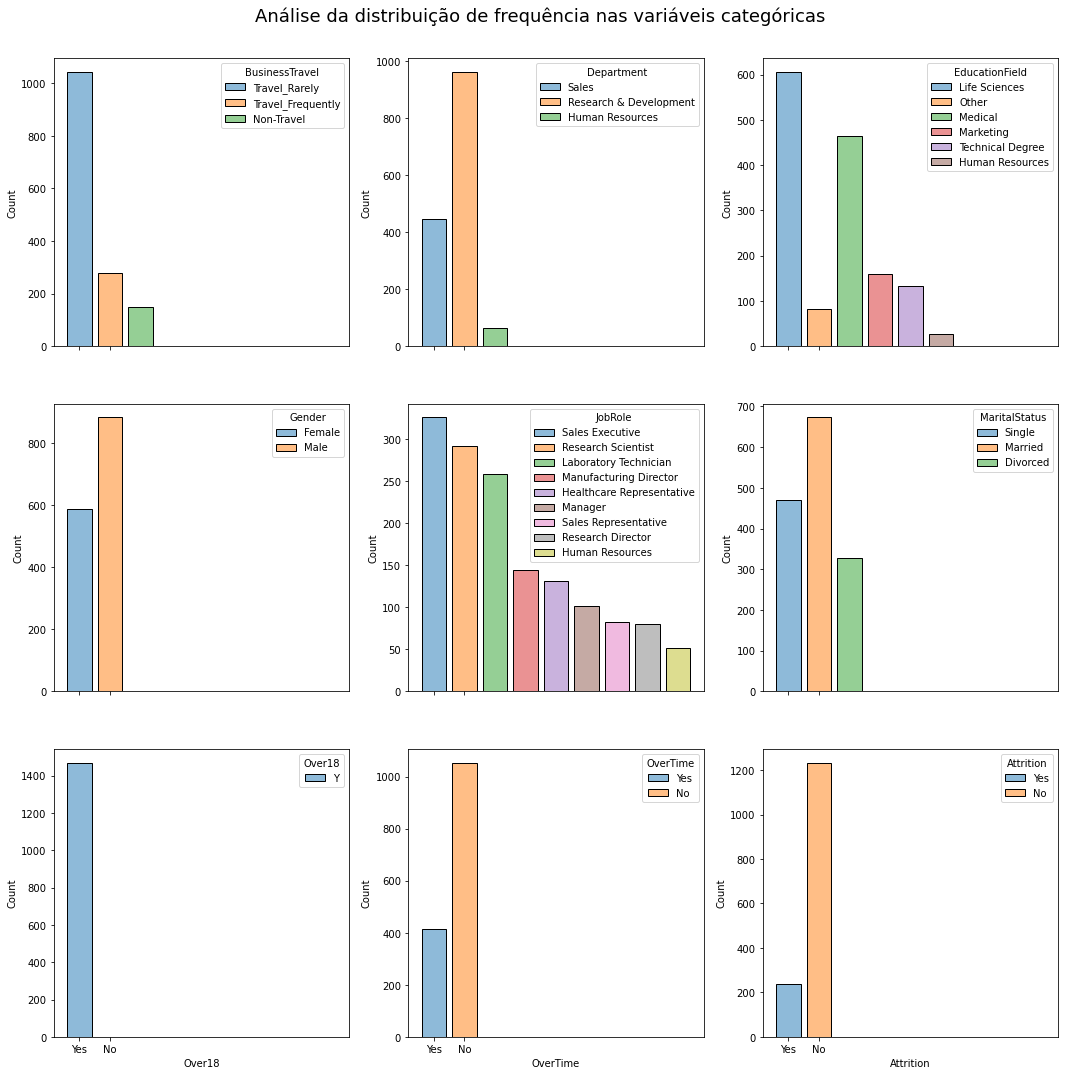

In [57]:
## Análise de frequência das variáveis categóricas

fig, axs = plt.subplots(3,3, sharex = True, figsize = (18,18))
fig.suptitle('Análise da distribuição de frequência nas variáveis categóricas', fontsize = 18, 
             ha = 'center', x = 0.5, y = .92)

sns.histplot(ax = axs[0,0],data = categ, x = 'BusinessTravel', hue = 'BusinessTravel', 
             stat = 'count',discrete = True, shrink = .8)
sns.histplot(ax = axs[0,1],data = categ, x = 'Department', hue = 'Department', 
             stat = 'count',discrete = True, shrink = .8)
sns.histplot(ax = axs[0,2],data = categ, x = 'EducationField', hue = 'EducationField', 
             stat = 'count',discrete = True, shrink = .8)
sns.histplot(ax = axs[1,0],data = categ, x = 'Gender', hue = 'Gender', 
             stat = 'count',discrete = True, shrink = .8)
sns.histplot(ax = axs[1,1],data = categ, x = 'JobRole', hue = 'JobRole', 
             stat = 'count',discrete = True, shrink = .8)
sns.histplot(ax = axs[1,2],data = categ, x = 'MaritalStatus', hue = 'MaritalStatus', 
             stat = 'count',discrete = True, shrink = .8)
sns.histplot(ax = axs[2,0],data = categ, x = 'Over18', hue = 'Over18', 
             stat = 'count',discrete = True, shrink = .8)
sns.histplot(ax = axs[2,1],data = categ, x = 'OverTime', hue = 'OverTime', 
             stat = 'count',discrete = True, shrink = .8)
sns.histplot(ax = axs[2,2],data = dset, x = 'Attrition', hue = 'Attrition',
             stat = 'count',discrete = True, shrink = .8, binwidth = 5)

### Comentários

- Pela análise das variáveis **_Department_** e **_Education Field_**, verifica-se que a empresa provavelmente encontra-se no setor de saúde, possuindo uma forte vertente de pesquisa e comercialização dessa pesquisa para o mercado. 
- A variável **_Over18_** não apresenta nenhum tipo de variação e, desse modo, será excluída da base de dados pois não apresenta nenhum tipo de informação relevante para o problema;
- Pela análise da variável **_Attrition_**, percebe-se que a existência de funcionários que possuíram atrito é muito menor,  possuindo um forte desbalanceamento dos dados, como evidenciando pelo último gráfico da seção. **Possivelmente, esse desequilíbrio entre as classes pode afetar o desempenho do treinamento e previsão dos modelos. Por isso, pode ser interesse testar o balanceamento das classes durante a avaliação dos modelos.**

### Análise das variáveis numéricas

- Matriz contendo estatísticas descritivas simples (média, moda e mediana), desvio padrão e valores máximo e mínimo dentro do intervalo;
- Variáveis _Employee Count_ e _Standard Hours_ não apresentam variações e, por isso, serão excluídas do dataframe contendo as variáveis numéricas.
- A variável _Employee Number_, provavelmente, indica uma numeração dada para cada funcionário. Portanto, também será excluído por não ter significado descritivo para o problema.

P.s: O código abaixo poderia ser substituído pelo comando **num.describe()**, contudo o códido desenvolvido foi uma maneira de treinamento e manipulação de dados das funções de estatística descritiva dentro da bibliotecas pandas.

In [58]:
## Tratamento das variáveis numéricas e categóricas

# Variável Over18 não apresenta nenhuma variação -- Histograma para análise de frequência
categ = categ.drop('Over18', axis = 1)

# Listagem das variáveis numéricas
nomes = num.columns.values
listnomes = list(nomes)
#print(listnomes)

# Criação de um dataframe para avaliação de estatísticas básicas

M = pd.DataFrame({
    "Variáveis":listnomes,
    "Média":0,
    "Mediana":0,
    "Desvio Padrão":0,
    "Mínimo": 0,
    "Máximo":0   
})

# Preenchimento dos espaços da matriz

for i, col in enumerate(M.index):
    M.loc[i,'Média'] = num.iloc[:,i].mean()
    M.loc[i,'Mediana'] = num.iloc[:,i].median()
    M.loc[i,'Desvio Padrão'] = num.iloc[:,i].std()
    M.loc[i,'Mínimo'] = num.iloc[:,i].min()
    M.loc[i,'Máximo'] = num.iloc[:,i].max()
    
nulo = []
for j,row in enumerate(M['Desvio Padrão']):
    if M.loc[j,'Desvio Padrão'] == 0:        # Variável que não apresentam nenhuma variação
        nulo = np.append(nulo,j)
        nulo = np.int_(nulo)
        
display(M)

# Variáveis EmployeeCount e StandardHours não apresentam nenhuma variação
num = num.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis = 1)

,Variáveis,Média,Mediana,Desvio Padrão,Mínimo,Máximo
0,Age,36.923810,36.0,9.135373,18,60
1,DailyRate,802.485714,802.0,403.509100,102,1499
2,DistanceFromHome,9.192517,7.0,8.106864,1,29
3,Education,2.912925,3.0,1.024165,1,5
4,EmployeeCount,1.000000,1.0,0.000000,1,1
5,EmployeeNumber,1024.865306,1020.5,602.024335,1,2068
6,EnvironmentSatisfaction,2.721769,3.0,1.093082,1,4
7,HourlyRate,65.891156,66.0,20.329428,30,100
8,JobInvolvement,2.729932,3.0,0.711561,1,4
9,JobLevel,2.063946,2.0,1.106940,1,5


### Cálculo da matriz de correlação

- Encoding da variável **_Attrition_** para cálculo da matriz de correlação - Tratamento inicial das variáveis;
- Análise preliminar do comportamento de variáveis contidas no dataframe.

Age                        -0.159205
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Attrition                   1.000000
Name: Attrition, dtype: float64

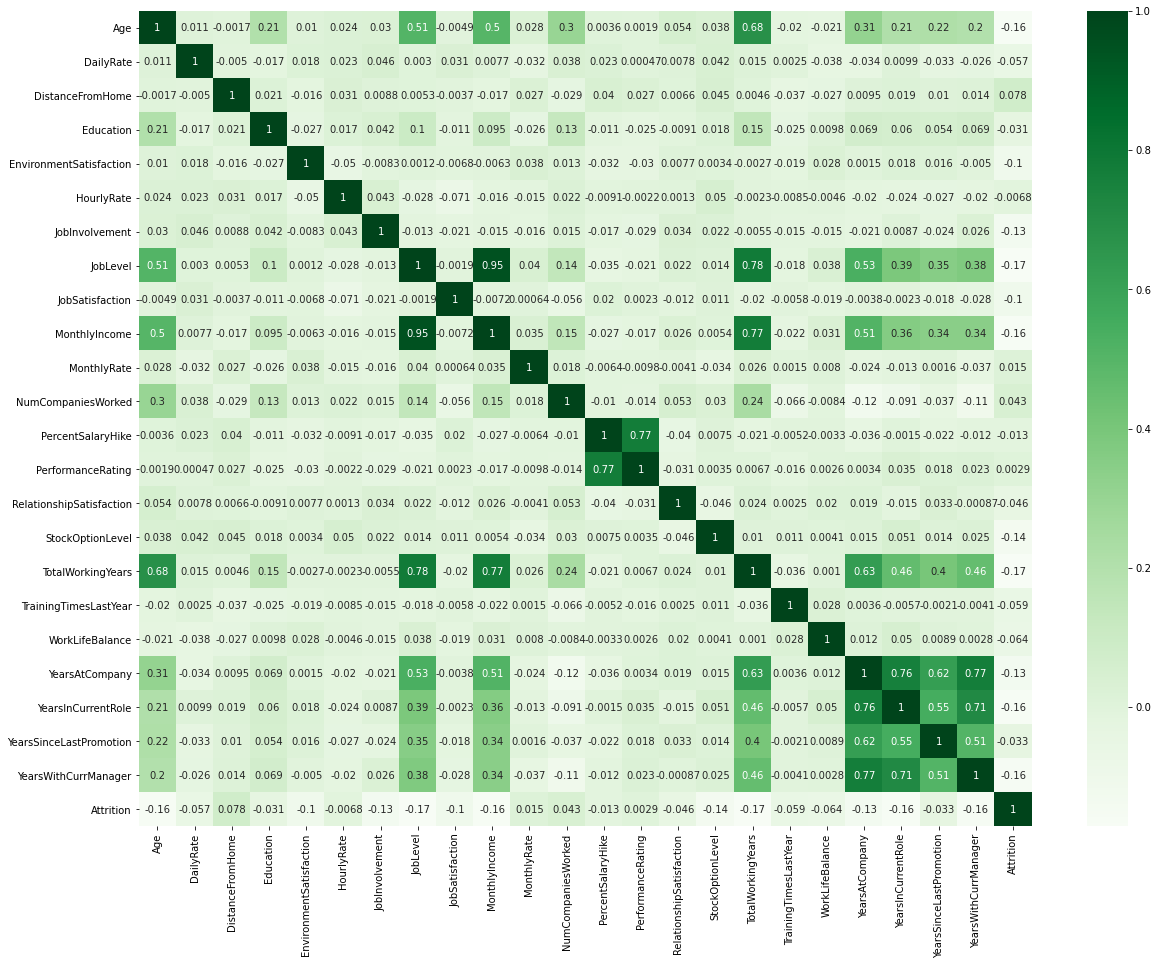

In [59]:
# Substituindo as variáveis de Attrition - Variável categórica para classificação binária
Y = Y.replace({'No':0,'Yes':1})

# Merge de dataframes para cálculo da matriz de correlação
num2 = pd.concat([num,Y], axis = 1)
#num2.info()
correl = num2.corr()

plt.figure(figsize = (20, 15))
sns.heatmap(correl, annot = True, cmap = 'Greens')

display(correl['Attrition'])

### Comentários

- Interessante notar que algumas variáveis possuem correlação positiva forte (> 0.7), indicando características esperadas para um ambiente de trabalho com diferentes posições e níveis salariais. Por exemplo, a variável _MonthlyIncome_ e _Joblevel_ possuem correlação = 0.95. **Isso indica um comportamento similar dessas variáveis, o que pode justificaria uma possível exclusão de uma delas para diminuir a dimensão do dataset. Contudo, pela quantidade limitade de informações, ambas serão mantidas durante a análise dos modelos até uma análise complementar de _mutual information_**.
- A maioria das variáveis possuem correlação negativa com a variável _Attrition_. As variáveis _DistanceFromHome_ e _NumCompaniesWorked_ são as variáveis com maior correlação positiva. Pode-se cogitar a possibilidade de que a distância de casa tenha influência no desempenho laboral e situações de estresse, assim como o maior número de companhias trabalhadas poderia indicar uma dificuldade de relacionamento interpessoal do funcionário em questão. **Contudo, é importante frisar que correlação não é garantia de causalidade!**

### Definição de Funções para Análise de Outliers

Definição de funções para auxiliar na análise de outliers das colunas e realização dos gráficos:

- Verificação dos limites das variáveis _MonthlyRate_ e _MonthlyIncome_;
- Análise do comportamento das variáveis _DistanceFromHome_ e _NumCompaniesWorked_.

In [60]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

In [61]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x = coluna, ax = ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x = coluna, ax = ax2)
    
def histograma(coluna):
    plt.figure(figsize = (15, 5))
    sns.distplot(coluna, hist = True)

def grafico_barra(coluna):  
    plt.figure(figsize = (15, 5))
    ax = sns.barplot(x = coluna.value_counts().index, y = coluna.value_counts())
    ax.set_xlim(limites(coluna))

### Anáise da variável _'MonthlyIncome'_

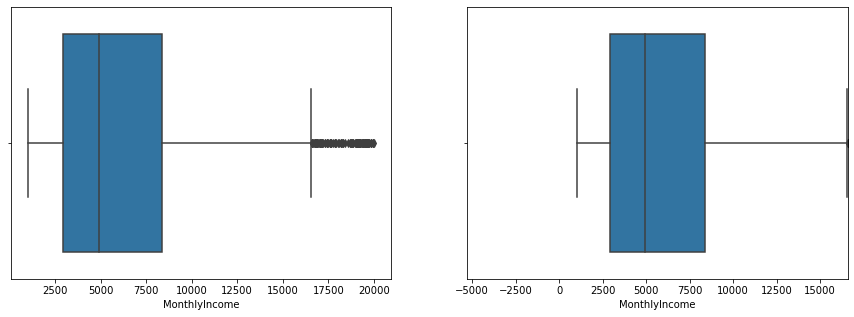

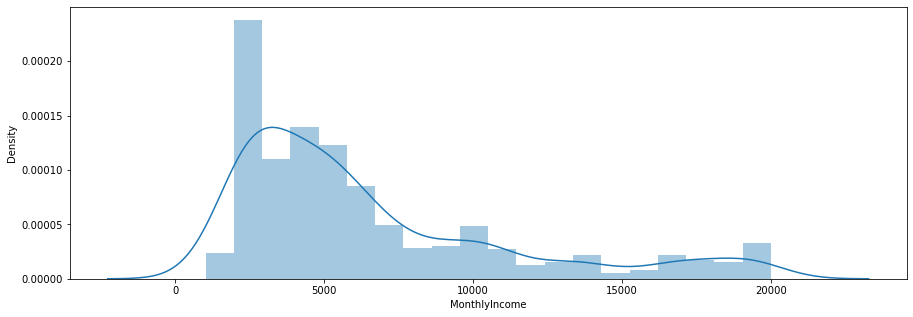

In [62]:
diagrama_caixa(num['MonthlyIncome'])
histograma(num['MonthlyIncome'])

- Existe uma quantidade significativa de outliers para essa variável. Contudo, esses outliers podem fornecer informações importantes para previsão de ajuste do modelo considerando a quantidade limitada de dados. Usualmente, pessoas com maior renda/salário dentro da empresa possuem maiores responsabilidades e vivência de situações de estresse, resultando em atritos dentro da equipe ou empresa. 

### Anáise da variável _'MonthlyRate'_

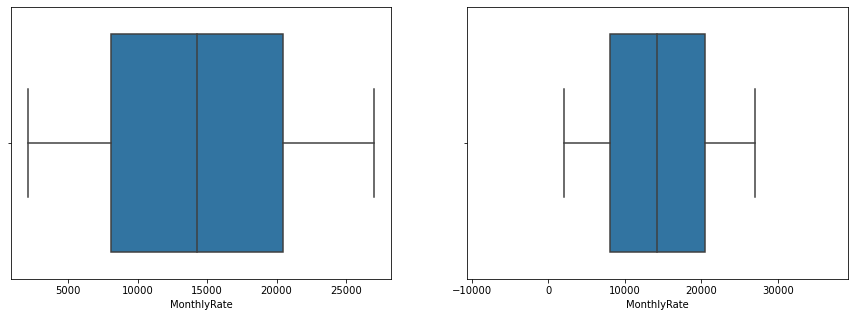

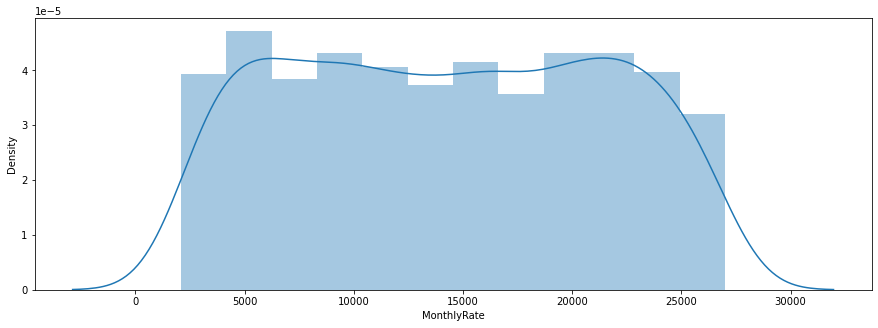

In [63]:
diagrama_caixa(num['MonthlyRate'])
histograma(num['MonthlyRate'])

- A variável _MonthlyRate_ apresenta uma distribuição comportada, sem a presenção de outliers evidenciado pelo boxplot. O resultado apresentado pelo histograma evidencia uma distribuição aproximadamente uniforme dentro do intervalo de valores. 

### Anáise da variável _'DistanceFromHome'_

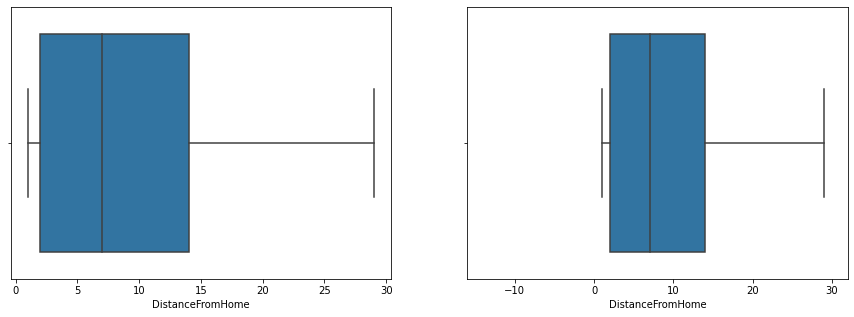

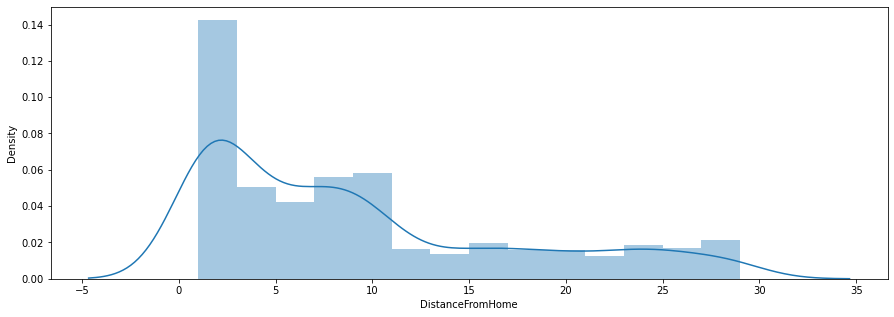

In [64]:
diagrama_caixa(num['DistanceFromHome'])
histograma(num['DistanceFromHome'])

- A análise indica que mais de 75% dos empregados dessa companhia moram a menos de 15 km do local de trabalho, tendo uma concentração em uma distância inferior a 7 km do trabalho (50% da base de dados). Possivelmente, segundo a análise inicial desenvolvida pela correlação, essa variável indicava maior possibilidade de desgaste do funcionários.

### Anáise da variável _''NumCompaniesWorked''_

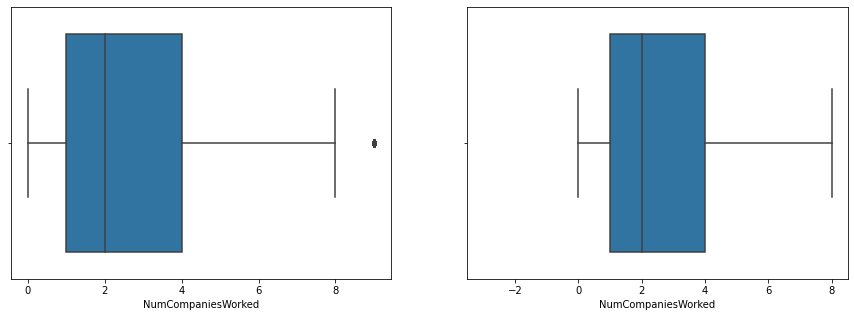

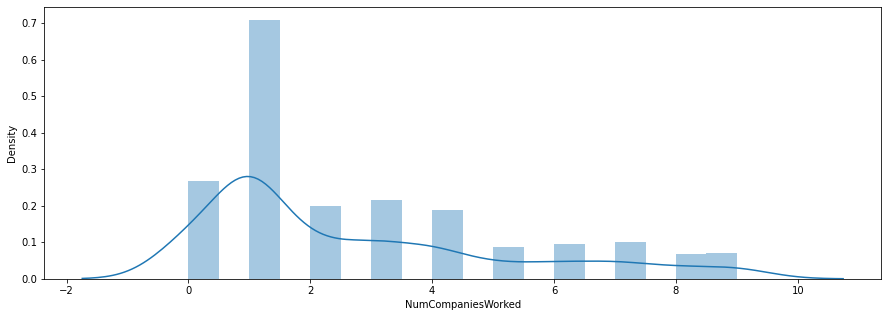

In [65]:
diagrama_caixa(num['NumCompaniesWorked'])
histograma(num['NumCompaniesWorked'])

- Assim como a variável _DistanceFromHome_, a análise indica que 75% dos empregados dessa companhia trabalharam em 4 empresas ou menos, sendo que 50% trabalharam em 2 ou menos empresas. Segundo o resultado da matriz de correlação, um maior número de empresas trabalhadas poderia indicar maior possibilidade de desgaste de funcionários. 

### Análise _Mutual Information_

- A matriz de correlação faz apenas a medição linear entre duas variáveis, o que pode fornecer interpretações rasas sobre a relação entre duas variáveis. Os dados fornecidos pelas matrizes de correlação fornecem o comportamento entre duas variáveis, contudo não indicam relação de causalidade lógica;
- A análise _mutual information_ entre duas variáveis mensura a relação não-linear entre variáveis, indicando quanta informação pode ser obtida para uma variável aleatória observando outra variável aleatória; 
- O desenvolvimento da teoria é diretamente relacionado com o conceito de **entropia**, podendo também ser conhecido como **redução da incerteza** de uma variável aleatória caso outra seja conhecida. **Portanto, um valor alto para _mutual information_ indica uma grande redução de incerteza, enquanto um valor baixo indica uma pequena diminuição. Caso o valor seja zero ou próximo de zero, indica-se que as variáveis são independentes**;
- **Portanto, essa análise auxilia diretamente a escolha de _features_ para um modelo de acordo com o problema de negócio.**

In [66]:
## Cálculo da relação mutual information 

mut_info = pd.DataFrame(mutual_info_classif(num2, Y))

# Criação do dataframe 
names = num2.columns.values
listnames = list(names)
M = pd.DataFrame({
    "Variáveis":listnames,
    "Mutual Information":0
})

# Critérios para feature selection de acordo com análise de entropia cruzada  
colunas = []

for i in mut_info.index:
    
    M.loc[i,'Mutual Information'] = mut_info.loc[i,0]
    
    # Critério para exclusão de colunas dentro do problema de negócio
    if M.loc[i,'Mutual Information'] <= 0.005:
        nome = M.loc[i,'Variáveis'] 
        print("Variável excluída segundo critério: {} ".format(nome))
        colunas = np.append(colunas,nome)
    
display(M)
display(colunas)

Variável excluída segundo critério: DailyRate 
Variável excluída segundo critério: DistanceFromHome 
Variável excluída segundo critério: Education 
Variável excluída segundo critério: HourlyRate 
Variável excluída segundo critério: JobSatisfaction 
Variável excluída segundo critério: MonthlyRate 
Variável excluída segundo critério: PerformanceRating 
Variável excluída segundo critério: RelationshipSatisfaction 
Variável excluída segundo critério: WorkLifeBalance 
Variável excluída segundo critério: YearsSinceLastPromotion 
Variável excluída segundo critério: YearsWithCurrManager 


,Variáveis,Mutual Information
0,Age,0.018679
1,DailyRate,0.000000
2,DistanceFromHome,0.000000
3,Education,0.000000
4,EnvironmentSatisfaction,0.023904
5,HourlyRate,0.000000
6,JobInvolvement,0.012259
7,JobLevel,0.025541
8,JobSatisfaction,0.000000
9,MonthlyIncome,0.034504


array(['DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate',
       'JobSatisfaction', 'MonthlyRate', 'PerformanceRating',
       'RelationshipSatisfaction', 'WorkLifeBalance',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='<U32')

### Análise mutual information

- Retirada das colunas pelas análise de mutual information
- Tratamento do dataset numérico

In [67]:
num = num.drop(columns = colunas, axis = 1)
display(num.head(5))

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole
0,41,2,3,2,5993,8,11,0,8,0,6,4
1,49,3,2,2,5130,1,23,1,10,3,10,7
2,37,4,2,1,2090,6,15,0,7,3,0,0
3,33,4,3,1,2909,1,11,0,8,3,8,7
4,27,1,3,1,3468,9,12,1,6,3,2,2


### Enconding 

- Features de Valores True or False ou classificação binária precisam ser transformados em variáveis numéricas;
- Features de categorias serão tratados pelo método de variáveis dummies.
- **Obs: A variável dependente _Attrition_ já está devidamente preenchida para análise da matriz de correlação.** 

### Normalização de variáveis numéricas contínuas

- Evitar distorções por diferenças de escala numérica durante o treinamento do modelo.
- Variáveis: _MonthlyRate_,_MonthlyIncome_ e _DailyRate_

In [68]:
# Exclusão de colunas durante a análise de mutual information

# Aplicação da função log para diminuição do efeito de escala
num['MonthlyIncome'] = np.log(num['MonthlyIncome'])
#num['MonthlyRate'] = np.log(num['MonthlyRate'])
#num['DailyRate'] = np.log(num['DailyRate'])

# Transformação das variáveis categóricas em dummies
categ = pd.get_dummies(data = categ)

# Retirar uma das colunas de cada dummy que foi transformada - Colunas de referência

categ = categ.drop(columns = ['BusinessTravel_Non-Travel', 'Department_Human Resources', 'EducationField_Human Resources', 
                             'Gender_Male','JobRole_Manufacturing Director', 'MaritalStatus_Divorced', 'OverTime_No'])

df = pd.concat([num,categ], axis = 1)
display(df.head(5))

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,3,2,8.698347,8,11,0,8,0,...,0,0,0,0,0,1,0,0,1,1
1,49,3,2,2,8.542861,1,23,1,10,3,...,0,0,0,0,1,0,0,1,0,0
2,37,4,2,1,7.644919,6,15,0,7,3,...,0,1,0,0,0,0,0,0,1,1
3,33,4,3,1,7.975565,1,11,0,8,3,...,0,0,0,0,1,0,0,1,0,1
4,27,1,3,1,8.151333,9,12,1,6,3,...,0,1,0,0,0,0,0,1,0,0


## Modelo Linear Generalizado (GLM)

- O modelo linear generalizado (GLM) flexibiliza as equações da variável dependente _i_ como normalmente distribuída, fazendo com que a distribuição desta seja outra distribuição da família exponencial; 

- Distribuição da família exponencial conta com modelos como: Normal, Binomial, _Poisson_, gamma, exponencial, dentre outras;

- Uma função de ligação (_link function_) relaciona o preditor linear com a média da distribuição utilizada (cada distribuição tem sua _link function_ pertinente);

- Para resolução do GLM, usualmente se utiliza a função de máxima verossimilhança(_likelihood_) para a distribuição utilizada com as observações do dataset. A maximização da função de verossimilhança permite determinar os parâmetros de distribuição (população) que gerou a variável dependente (y), e como a média da distribuição é relacionada com o preditor linear através da _link function_, determinar os coeficientes para cada variável explicativa;

- Os métodos de otimização iterativos utilizados tais como gradiente descendente, método de Newton ou _Quasi-Newton_ usam informações da derivada da função de verossimilhança.

## Regressão Logística

- Assuma a distribuição de Bernoulli (caso especial da distribuição binomial), sendo que a _link function_ da distribuição de Bernoulli é chamada de função logística (sendo normalmente expressa da maneira inversa);
- A função logística calcula uma probabilidade da variável dependente y pertencer a uma categoria, dado o preditor linear (variáveis explicativas);
- Como dito anteriormente, o GLM maximiza a função de verossimilhança, sendo o valor representado pelo erro de entropia cruzada (_cross-entropy error_). Por questões de resolução de problema, a regressão logística torna-se um problema de minimização do erro de entropia cruzada;
- A regularização é uma ferramenta para evitar _overfitting_ em métodos de aprendizado de máquina. A regressão linear possui regularização do tipo L1(_Lasso_) e L2(_Ridge_), onde cada termo adiciona um termo de penalização a função objetivo da otimização (o melhor parâmetro corresponde ao multiplicador de Lagrange associado ao coeficiente do preditor linear).

Quantidade de dados para treinamento: (1176, 33)

Quantidade de dados para teste: (294, 33)


Acurácia do modelo padrão: 86.4 %


Precisão do modelo padrão: 48.1 %

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.48      0.33      0.39        39

    accuracy                           0.86       294
   macro avg       0.69      0.64      0.66       294
weighted avg       0.85      0.86      0.85       294



Text(0.5, 257.44, 'Dados preditos')

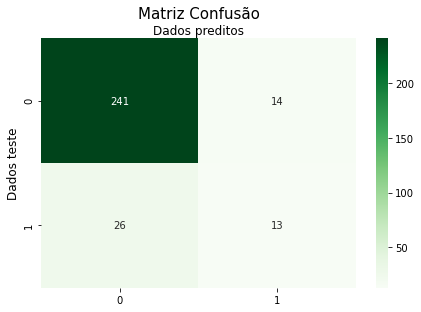

In [69]:
# Criando os dados de treino e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(df, Y, test_size = 0.20, random_state = 42)

# Verificando a quantidade de dados para cada porção 
print(f'Quantidade de dados para treinamento: {x_treino.shape}\n')
print(f'Quantidade de dados para teste: {x_teste.shape}\n')

# Importando biblioteca com algoritmo da regressão logística 
reglog = LogisticRegression(n_jobs = -1)

# Realizando a validação cruzada 
lista_C = list(np.logspace(0,10,50))
param_grid = dict(C = lista_C) 
clf = GridSearchCV(reglog, param_grid, cv = 10, scoring = 'recall')

# Ajustando modelo de regressão logística
clf.fit(x_treino, y_treino)
resultado_reglog = clf.predict(x_teste)

In [ ]:
# Avaliação e Visualização dos resultados
acuracia = accuracy_score(y_teste, resultado_reglog)
print('\nAcurácia do modelo padrão: {:.3} %\n'.format(acuracia*100))

precisao = precision_score(y_teste, resultado_reglog)
print('\nPrecisão do modelo padrão: {:.3} %\n'.format(precisao*100))

class_report = classification_report(y_teste, resultado_reglog)
print('Relatório de classificação:\n', class_report)

# Edição dos componentes do gráfico
classes = [0,1]
fig, ax = plt.subplots()
marcadores = np.arange(len(classes))
plt.xticks(marcadores, classes)
plt.yticks(marcadores, classes)

# Criação do mapa de calor
matriz_reglog = confusion_matrix(y_teste,resultado_reglog)
sns.heatmap(pd.DataFrame(matriz_reglog), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz Confusão', fontsize = 15)
plt.ylabel('Dados teste', fontsize = 12)
plt.xlabel('Dados preditos', fontsize = 12)

## Comentários

- Acurácia do modelo não foi baixa, porém grande parte dos acertos pertence à classe 0, ou seja, pessoas que não possuíram nenhum tipo de atrito dentro da empresa.
- O parâmetro _recall_ para classe 1 é muito inferior quando comparada à classe 0, o que significa uma baixa capacidade de previsão do modelo para os funcionários que podem ter algum tipo de atrito. O principal objetivo é identificar a probabilidade de um conflito baseado nas características apresentadas e, portanto, não foi efetivo nesse quesito. 
- Ambos os parâmetros de precisão e _recall_ foram melhores para a classe 0 e, consequentemente, o parâmetro _f1-score_ também foi significativamente superior para essa classe. 

## _Bagging_ e _Random Forest_

- As técnicas de _Bagging_ e _Random Forest_ foram criadas com a ideia do _emsemble learning_ (conjunto de estimadores para nossa variável dependente e consideramos a composição de todos os estimadores). A composição de diferentes estimadores pode melhorar o desempenho na predição encontrada, dando estabilidade às regressões e classificações;
- A técnica de _**Bootstraped Aggregation**_ (_Bagging_) consiste na criação de B datasets artificiais reamostrados do dataset original (com as mesmas dimensões) e para cada um desses datasets é treinada uma árvore de decisão. A previsão da nossa variável dependente é a média dos resultados de todas as B hipóteses encontradas;
- O método _Random Forest_ é uma modificação do _Bagging_ que torna as árvores menos correlacionadas entre si, e considera apenas um conjunto de variáveis _m_ do total de variáveis explicativas _p_.  

In [70]:
## Aplicação do algoritmo de Random Forest ##

from sklearn.ensemble import RandomForestClassifier

# Definindo melhores parâmetros entre as variáveis n_estimator, max_depth e min_samples_leaf
parameters = {'n_estimators':[30,40,50,60,70,80,90,100], 'max_depth':[3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[3,4,5,6,7,8,9,10]}
randomforest = RandomForestClassifier(n_jobs = -1)
clf2 = GridSearchCV(randomforest, parameters, cv = 10, scoring = 'accuracy', verbose = 1)

# Validação cruzada do modelo Random Forest 
clf2.fit(x_treino, y_treino)
random_forest = clf2.predict(x_teste)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits



Acurácia do modelo padrão: 87.1 %


Precisão do modelo padrão: 57.1 %

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



Text(0.5, 257.44, 'Dados preditos')

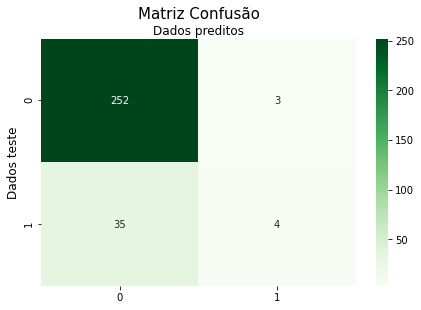

In [71]:
# Avaliação e Visualização dos resultados
acuracia = accuracy_score(y_teste, random_forest)
print('\nAcurácia do modelo padrão: {:.3} %\n'.format(acuracia*100))

precisao = precision_score(y_teste, random_forest)
print('\nPrecisão do modelo padrão: {:.3} %\n'.format(precisao*100))

class_report = classification_report(y_teste, random_forest)
print('Relatório de classificação:\n', class_report)

# Edição dos componentes do gráfico
classes = [0,1]
fig, ax = plt.subplots()
marcadores = np.arange(len(classes))
plt.xticks(marcadores, classes)
plt.yticks(marcadores, classes)

# Criação do mapa de calor
matriz_rf = confusion_matrix(y_teste, random_forest)
sns.heatmap(pd.DataFrame(matriz_rf), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz Confusão', fontsize = 15)
plt.ylabel('Dados teste', fontsize = 12)
plt.xlabel('Dados preditos', fontsize = 12)


## Comentários

- Acurácia do modelo não foi baixa, porém grande parte dos acertos pertence à classe 0, ou seja, pessoas que não possuíram nenhum tipo de atrito dentro da empresa (mesma tendência observada para o algoritmo de regressão logística);
- Para esse algoritmo, o parâmetro _recall_ para a classe 1 foi muito baixo, indicando pequena sensibilidade para os casos verdadeiros, ou seja, funcionários que tiveram algum tripo de atrito dentro da empresa;
- O parâmetro _f1-score_ obteve mesmo comportamento quando comparado ao modelo de regressão logística.
- **Comparativamente à regressão logística, a utilização do random forest não se justifica.** 

## Multilayer Perceptron (MLP)

- A rede neural recebe como entrada um vetor $X$ com $p$ variáveis denominado como _Input Layer_ (camada de entrada), e implementa a função não linear $Y = f(X)$, representada pela _Output Layer_ (camada de saída), combinando $K$ perceptrons nas camadas ocultas, caracterizada pelos _Hidden Layers_ (camadas ocultas).

In [72]:
# Importação da biblioteca do MLP

from sklearn.neural_network import MLPClassifier

# Validação cruzada inicial das redes neurais
parameters = {'hidden_layer_sizes':[50,60,70,80,90,100,110,120], 'activation':['tanh','logistic'],
             'batch_size' : [400,500] }
NN = MLPClassifier(solver = 'adam', max_iter = 2000)
clf = GridSearchCV(NN, parameters, cv = 5, scoring = 'accuracy', verbose = 2, n_jobs = -1)

# Validação cruzada do modelo Rede Neural
clf.fit(x_treino, y_treino)
MLP = clf.predict(x_teste)

Fitting 5 folds for each of 32 candidates, totalling 160 fits



 Hiperparâmetros otimizados: {'activation': 'logistic', 'batch_size': 400, 'hidden_layer_sizes': 80} 


Acurácia do modelo padrão: 83.0 %


Precisão do modelo padrão: 33.3 %

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       255
           1       0.33      0.28      0.31        39

    accuracy                           0.83       294
   macro avg       0.61      0.60      0.60       294
weighted avg       0.82      0.83      0.82       294



Text(0.5, 257.44, 'Dados preditos')

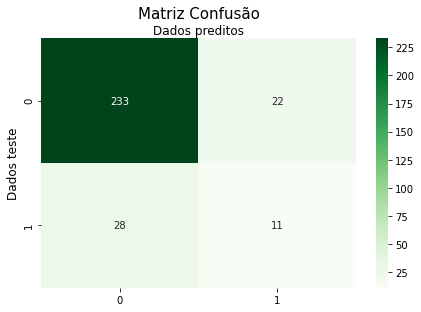

In [73]:
# Avaliação e Visualização dos resultados

print('\n Hiperparâmetros otimizados: {} \n'.format(clf.best_params_) )

acuracia = accuracy_score(y_teste, MLP)
print('\nAcurácia do modelo padrão: {:.3} %\n'.format(acuracia*100))

precisao = precision_score(y_teste, MLP)
print('\nPrecisão do modelo padrão: {:.3} %\n'.format(precisao*100))

class_report = classification_report(y_teste, MLP)
print('Relatório de classificação:\n', class_report)

# Edição dos componentes do gráfico
classes = [0,1]
fig, ax = plt.subplots()
marcadores = np.arange(len(classes))
plt.xticks(marcadores, classes)
plt.yticks(marcadores, classes)

# Criação do mapa de calor
matriz_mlp = confusion_matrix(y_teste, MLP)
sns.heatmap(pd.DataFrame(matriz_mlp), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz Confusão', fontsize = 15)
plt.ylabel('Dados teste', fontsize = 12)
plt.xlabel('Dados preditos', fontsize = 12)

## Comentários

- Acurácia do modelo não foi baixa, porém grande parte dos acertos pertence à classe 0, ou seja, pessoas que não possuíram nenhum tipo de atrito dentro da empresa (mesma tendência observada para o algoritmo de regressão logística e _random forest_);
- Para esse algoritmo, o parâmetro _recall_ para a classe 1 foi o melhor dentre os três, indicando melhor sensibilidade para os casos verdadeiros, ou seja, funcionários que tiveram algum tripo de atrito dentro da empresa;
- O parâmetro _f1-score_ obteve mesmo comportamento quando comparado ao modelo de regressão logística.

## Conclusões

- O problema de classificação binário definido através da variável _'Attrition'_ foi avaliado para os algoritmos de classificação regressão logística, _random forest_ e MLP; 
- A combinação das análises do correlograma e _mutual information_ fornecem informações relevantes para escolha das _features_ para o modelo de negócio proposto, além de complementar e/ou confirmar diretamente hipóteses assumidas pela análse exploratória de dados. 
- O parâmetro _recall_ em relação à classe 1 (saída do cliente) demonstrou resultado ruins para os três algoritmos, indicando pouca sensibilidade em relação aos dados reais verdadeiros. Os parâmetros acurácia e precisão calculados foram satisfatórios, porém correspondiam majoritariamente a qualidade de previsão para a classe 0, ou seja, clientes que permaneceram dentro do banco.
- **Para o problema de negócio definido pela análise de _churn_, a técnica de regressão logística demonstrou o melhor desempenho em relação à análise das métricas escolhidas e resolução do problema de negócio. Observa-se que é necessária a melhoria da previsão dos dados em relação à classe 1, ou seja, saída dos clientes. O desempenho inferior dos algoritmos mais sofisticados (_random forest_, MLP) releva um desempenho inferior, o que pode ser indicado pela quantidade limitada de informações dentro do dataset.**
- **Os próximos passos para melhoria do projeto seriam o teste de novos algoritmos de classificação, a tentativa de _emsemble learnig_ e o balanceamento de dados da variável dependente (_Attrition_).** 